# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np 

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_test) + 1 #label count starts with 0

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Pixel values range from {0} - {1}".format(np.min(X_train),np.max(X_train)))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Pixel values range from 0 - 255


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class labels:  [9, 2, 15, 38, 25, 9, 25, 12, 18, 2]


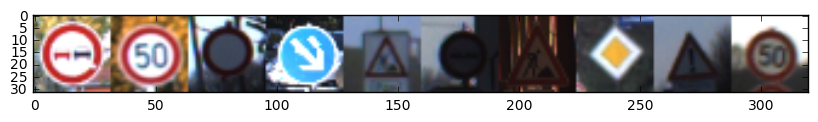

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

random_images = []
random_images_labels = []
for i in range(10):
    index = random.randint(0, len(X_train))
    random_images.append(X_train[index].squeeze())
    random_images_labels.append(y_train[index])

plt.figure(figsize=(10,1))
plt.imshow(np.hstack(random_images), cmap='gray')
print("Class labels: ", random_images_labels)

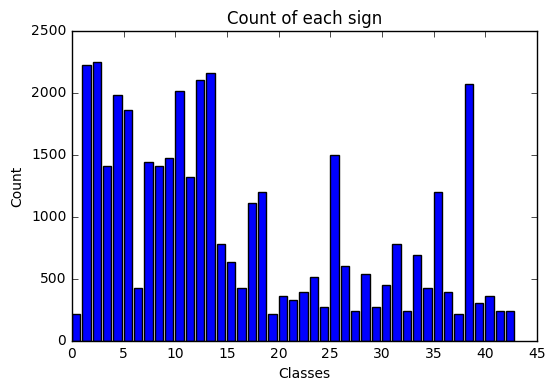

Count values range from 210.0 - 2250.0
Mean and median count values are: 911.8372093023256, 600.0


In [4]:
#display count of classes

Y_train = np.zeros((n_train, n_classes))
for i in range(n_train):
    Y_train[i,y_train[i]] = 1
Y_count = np.sum(Y_train,0)

plt.bar(np.arange(n_classes),Y_count)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of each sign')
plt.show()

print("Count values range from {0} - {1}".format(np.min(Y_count),np.max(Y_count)))
print("Mean and median count values are: {0}, {1}".format(np.mean(Y_count),np.median(Y_count)))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
import cv2

def preprocess1(image_data):
    """
    Convert input images into grayscale
    
    :param image_data: The image data to be pre-processed
    :return image_data_out: Grayscaled image data
    """
    
    image_data_out = np.zeros((image_data.shape[0], image_data.shape[1], image_data.shape[2], 1))
    num_images = image_data.shape[0]
    for i in range(num_images):
        image = image_data[i,:,:,:]
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image_data_out[i,:,:,:] = np.reshape(gray_image, (32,32,1))
    return image_data_out       

In [6]:
def preprocess2(image_data):
    """
    Convert input images into grayscale and normalizes histogram
    
    :param image_data: The image data to be pre-processed
    :return image_data_out: Grayscaled and histogram equalized image data
    """
    
    image_data_out = np.zeros((image_data.shape[0], image_data.shape[1], image_data.shape[2], 1))
    num_images = image_data.shape[0]
    for i in range(num_images):
        image = image_data[i,:,:,:]
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hist_image = cv2.equalizeHist(gray_image)
        image_data_out[i,:,:,:] = np.reshape(hist_image, (32,32,1))
    return image_data_out       

In [7]:
def standardize(image_data):
    """
    Normalize input images by centering around mean and enforcing unit
    standard deviation.
    
    :param image_data: The image data to be normalized
    :return image_data_out: Mean centered image data with unit standard deviation
    """

    image_data_out = np.zeros((image_data.shape[0], image_data.shape[1], image_data.shape[2], image_data.shape[3]))
    num_images = image_data.shape[0]
    for i in range(num_images):
        image = image_data[i,:,:,:]
        conv_image = (image - np.mean(image))/(np.std(image) + 1e-8)
        image_data_out[i,:,:,:] = np.reshape(conv_image, (32,32,1))
    return image_data_out    

In [8]:
def augment(image_data, labels):
    """
    Augment input training data by adding 3 transformed versions of each
    image in the training set: each sample is randomly translated [-2,2] pixels,
    rotated [-15,15] degrees and scaled [.9,1.1] ratio. This is inspired by
    "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by
    Sermanet and LeCun.
    
    :param image_data: The image data to be augmented
    :param labels: Labels corresponding to input image data
    :return image_data_out: Augmented image data
    :return labels_out: Labels corresponding to augmented image data
    
    """
    
    image_data_out = np.zeros((image_data.shape[0]*4, image_data.shape[1], image_data.shape[2], image_data.shape[3]))
    labels_out = np.zeros((labels.shape[0]*4))
    num_images = image_data.shape[0]
    ind = 0
    for i in range(num_images):
        image = image_data[i,:,:,:]
        M1 = np.float32([[1,0,np.random.randint(-2,2)],[0,1,np.random.randint(-2,2)]])
        M2 = np.float32([[np.random.randint(90,110)/100.0,0,0],[0,np.random.randint(90,110)/100.0,0]])
        M3 = cv2.getRotationMatrix2D((image.shape[1]/2,image.shape[0]/2),np.random.randint(-15,15),1)
        image1 = cv2.warpAffine(image,M1,(image.shape[1],image.shape[0]))
        image2 = cv2.warpAffine(image,M2,(image.shape[1],image.shape[0]))
        image3 = cv2.warpAffine(image,M3,(image.shape[1],image.shape[0]))
        image_data_out[ind,:,:,:] = np.reshape(image, (32,32,1))
        image_data_out[ind+1,:,:,:] = np.reshape(image1, (32,32,1))
        image_data_out[ind+2,:,:,:] = np.reshape(image2, (32,32,1))
        image_data_out[ind+3,:,:,:] = np.reshape(image3, (32,32,1))
        labels_out[ind] = labels[i]
        labels_out[ind + 1] = labels[i]
        labels_out[ind + 2] = labels[i]
        labels_out[ind + 3] = labels[i]
        ind += 4
    return image_data_out, labels_out    

Class labels:  [11, 38, 22, 10, 28, 5, 1, 13, 10, 9]


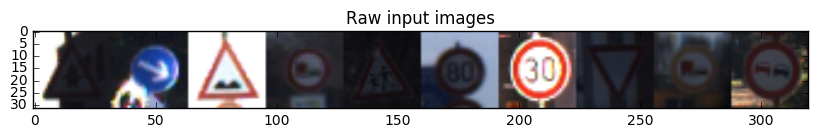

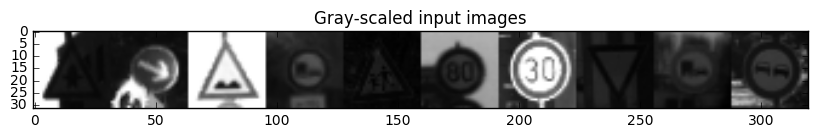

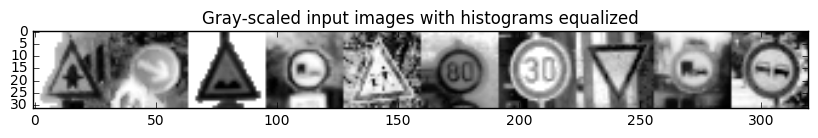

In [9]:
###Example demonstration of preprocessing input images

#Select 10 random images
indices = []
random_images = []
random_images_labels = []
for i in range(10):
    index = random.randint(0, len(X_train))
    indices.append(index)
    random_images.append(X_train[index].squeeze())
    random_images_labels.append(y_train[index])

#plot images
plt.figure(figsize=(10,1))
plt.title("Raw input images")
plt.imshow(np.hstack(random_images))

#apply grayscaling
temp1 = preprocess1(X_train[indices])
preprocessed_images1 = []
for i in range(10):
    preprocessed_images1.append(temp1[i].squeeze())

#plot grayscaled images
plt.figure(figsize=(10,1))
plt.title("Gray-scaled input images")
plt.imshow(np.hstack(preprocessed_images1),cmap='gray')

#apply preprocessing 
temp2 = preprocess2(X_train[indices])
preprocessed_images2 = []
for i in range(10):
    preprocessed_images2.append(temp2[i].squeeze())

#plot preprocessed images
plt.figure(figsize=(10,1))
plt.title("Gray-scaled input images with histograms equalized")
plt.imshow(np.hstack(preprocessed_images2),cmap='gray')
    
print("Class labels: ", random_images_labels)

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import tensorflow as tf

#For each input image, convert to grayscale, apply histogram normalization
# and normalize
X_train = preprocess2(X_train)
X_train = standardize(X_train)

X_test = preprocess2(X_test)
X_test = standardize(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The preprocessing step consisted of first converting each image into grayscale, equalizing the histogram and then standardizing each image to be mean-centered with unit standard deviation. The conversion into grayscale was performed because this ensures a simpler model with fewer parameters. In "Traffic Sign Recognition with Multi-Scale Convolutional Networks", the authors' best performing model ignores color information, suggesting there is enough discriminative information in the edge-appearances of the traffic sign images. 
As seen in some of the examples displayed above, there seems to be a lot of variance in the contrast or intensity-range of the input images. To ensure a uniform intensity range, OpenCV's equalistHist() function was used stretch out the intensity range in all images. Finally, as is good practice, all images were mean-centered with unit standard deviation.

In [ ]:
#Augment training set
X_train, y_train = augment(X_train, y_train)

In [680]:
### Generate data additional data -> Done in previous cell
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
#Further split train set into separate train and validation sets
# Uncomment when experimenting with validation set (commented for experiment on final test set)
# from sklearn.model_selection import train_test_split
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

# print("Number of training examples =", X_train.shape[0])
# print("Number of validation examples =", X_validation.shape[0])

Number of training examples = 109785
Number of validation examples = 47051


In [12]:
#Shuffle training set
X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The input training data was augmented by adding 3 transformed versions of each image in the training set. For each sample in the training set, 3 additional samples were created by randomly translating the original by [-2,2] pixels, randomly rotating the original by [-15,15] degrees and randomly scaling the original by [.9,1.1] ratio. This was inspired by Sermanet and LeCun's "Traffic Sign Recognition with Multi-Scale Convolutional Networks". Although this simple augmentation scheme provided the model with more examples to learn from, it did not, however, address the class imbalance in the training set.

The original training set was further divided into a training set, consisting of 70% of randomly chosen samples from the original, and a validation set, consisting of the remaining 30%. The models were trained by optimizing parameters on the train and validation set. Finally, the model with the best performance on the validation set was re-trained using the entire training set (training + validation data) and was evaluated using the provided test data (as well as the collected test set).

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [14]:
def LeNetColor(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [19]:
def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
def LeNet3(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 14x14x12. Output = 2352.
    fc_pre0 = flatten(conv1)
    
    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc_pre1 = flatten(conv2)

    # SOLUTION: Concat. Input = 2352, 800. Output = 3152.
    fc_pre   = tf.concat(1, [fc_pre0, fc_pre1])
    
    # SOLUTION: Layer 3: Fully Connected. Input = 3152. Output = 800.
    fc0_W = tf.Variable(tf.truncated_normal(shape=(3152, 800), mean = mu, stddev = sigma))
    fc0_b = tf.Variable(tf.zeros(800))
    fc0   = tf.matmul(fc_pre, fc0_W) + fc0_b
    
    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I experimented with 4 different types of models: <br />
a) LeNetColor: A vanilla LeNet that ingested a 3-channel color image. <br />
b) LeNet: A vanilla LeNet that ingested a 1-channel grayscale image. <br />
c) LeNet2: A LeNet model with twice the number of convolutional filters (12 in the 1st conv-layer, 32 in the second) <br />
d) LeNet3: A LeNet model where the output of the 1st conv-layer is concatenated with the output of the 2nd conv-layer and fed to the fully connected layers (inspired by the architecture presented in "Traffic Sign Recognition with Multi-Scale Convolutional Networks"). <br />
The best performing model on the validation set was chosen for final evaluations on the test sets.

In [16]:
EPOCHS = 20
BATCH_SIZE = 128

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [20]:
rate = 0.001

logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
print (X_train.shape)

(156836, 32, 32, 1)


In [23]:
train_acc_list = []
#val_acc_list = [] #uncomment when experimenting with validation set
test_acc_list = [] #comment when experimenting with validation set

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        train_accuracy = evaluate(X_train, y_train)
        train_acc_list.append(train_accuracy)
        #validation_accuracy = evaluate(X_validation, y_validation) #uncomment when experimenting with validation set
        #val_acc_list.append(validation_accuracy) #uncomment when experimenting with validation set
        test_accuracy = evaluate(X_test, y_test) #comment when experimenting with validation set
        test_acc_list.append(test_accuracy) #comment when experimenting with validation set
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy)) #uncomment when experimenting with validation set
        print("Test Accuracy = {:.3f}".format(test_accuracy)) #comment when experimenting with validation set
        print()
            
    saver.save(sess, 'lenet2_final')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.965
Test Accuracy = 0.937

EPOCH 2 ...
Train Accuracy = 0.983
Test Accuracy = 0.946

EPOCH 3 ...
Train Accuracy = 0.987
Test Accuracy = 0.951

EPOCH 4 ...
Train Accuracy = 0.990
Test Accuracy = 0.940

EPOCH 5 ...
Train Accuracy = 0.996
Test Accuracy = 0.958

EPOCH 6 ...
Train Accuracy = 0.996
Test Accuracy = 0.951

EPOCH 7 ...
Train Accuracy = 0.991
Test Accuracy = 0.944

EPOCH 8 ...
Train Accuracy = 0.993
Test Accuracy = 0.953

EPOCH 9 ...
Train Accuracy = 0.995
Test Accuracy = 0.954

EPOCH 10 ...
Train Accuracy = 0.997
Test Accuracy = 0.957

EPOCH 11 ...
Train Accuracy = 0.998
Test Accuracy = 0.958

EPOCH 12 ...
Train Accuracy = 0.997
Test Accuracy = 0.956

EPOCH 13 ...
Train Accuracy = 0.998
Test Accuracy = 0.957

EPOCH 14 ...
Train Accuracy = 0.997
Test Accuracy = 0.958

EPOCH 15 ...
Train Accuracy = 0.997
Test Accuracy = 0.959

EPOCH 16 ...
Train Accuracy = 0.998
Test Accuracy = 0.960

EPOCH 17 ...
Train Accuracy = 0.998
Test Accuracy = 

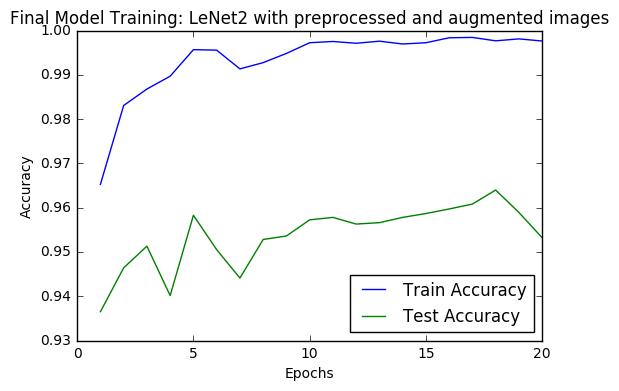

In [24]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Final Model Training: LeNet2 with preprocessed and augmented images')
plt.plot(range(1,21), np.asarray(train_acc_list), label='Train Accuracy')
plt.plot(range(1,21), np.asarray(test_acc_list), label='Test Accuracy')
plt.legend(loc='lower right')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The models were trained with a batch size of 128, for 20 epochs, using Adam. Default LeNet hyperparameters were used, except when changing the number of convolutional filters and/or adding an additional fully connected layer for one of the models. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I experimented with various settings of the model architecture as well as whether pre-processing and augmentation was performed in order to a) understand the effects of the changes I made, and b) incrementally improve model accuracy. Below are plots demonstrating the evolution of train and validation accuracy for different model-data settings: 

a) LeNetColor: A LeNet model edited to ingest the raw 3-channel color image (instead of grayscale images), without any preprocessing -> (Train Accuracy 0.985, Validation Accuracy 0.949)

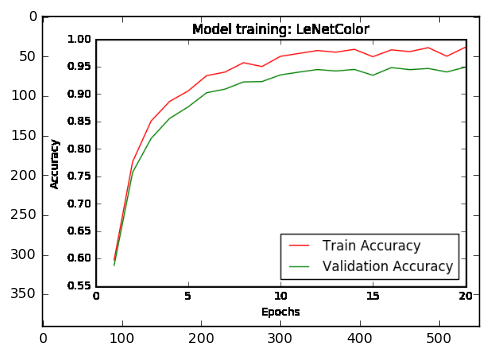

In [25]:
im = cv2.imread('modeltraining_LeNetColor.png')
plt.imshow(im)

b) LeNet: A vanilla LeNet model that ingested the raw 3-channel color images coverted to grayscale. -> (Train Accuracy 0.994, Validation Accuracy 0.971)

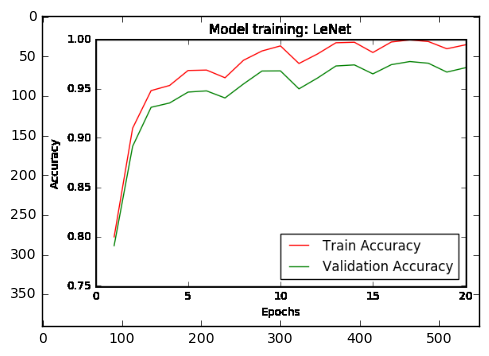

In [26]:
im = cv2.imread('modeltraining_LeNet.png')
plt.imshow(im)

c) LeNet_preprocessed: The vanilla LeNet model that ingested pre-processed (i.e. histogram equalized and mean centered) grayscale images. -> (Train Accuracy 0.997, Validation Accuracy 0.976)

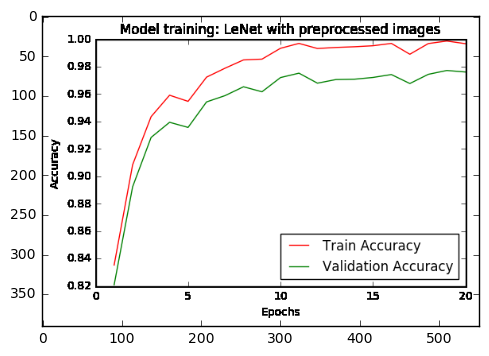

In [27]:
im = cv2.imread('modeltraining_LeNet_pp.png')
plt.imshow(im)

d) LeNet_preprocessed_augmented: The vanilla LeNet model that ingested pre-processed (i.e. histogram equalized and mean centered) grayscale images, with the augmented training set. -> (Train Accuracy 0.996, Validation Accuracy 0.985)

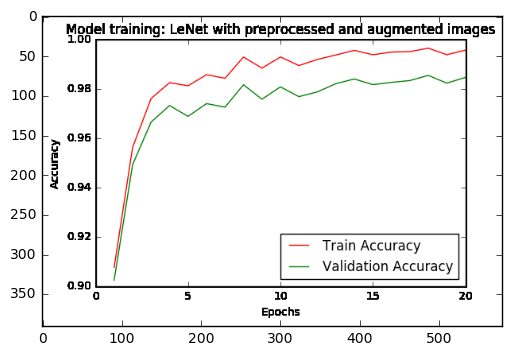

In [28]:
im = cv2.imread('modeltraining_LeNet_pp_augment.png')
plt.imshow(im)

e) LeNet2: An edited LeNet model with twice the number of convolutional kernels (12 in the first layer, 32 in the second) that ingested the pre-processed and augmented training set. -> (Train Accuracy 0.998, Validation Accuracy 0.990)

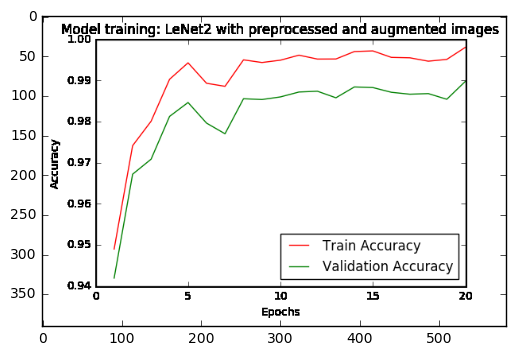

In [29]:
im = cv2.imread('modeltraining_LeNet2_pp_augment.png')
plt.imshow(im)

f) LeNet3: A LeNet model where the output of the 1st conv-layer is also fed directly to the end-classifier as higher-resolution features that ingested the pre-processed and augmented training set. -> (Train Accuracy 0.995, Validation Accuracy 0.987)

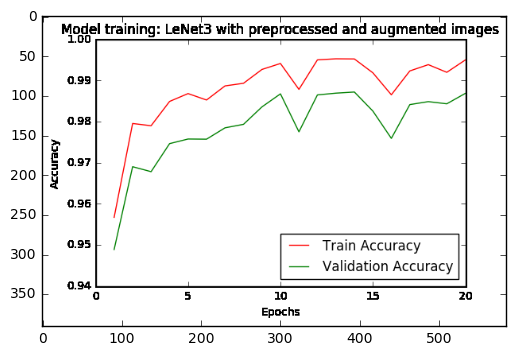

In [30]:
im = cv2.imread('modeltraining_LeNet3_pp_augment.png')
plt.imshow(im)

The experiments show i) that a grayscale representation of the training data yields better results on the validation set than the raw RGB representation (for the vanilla LeNet model), ii) pre-processing the data helps improve model accuracy, iii) data augmentation also helps improve model accuracy, iv) increasing model complexity by increasing number of convolutional filters also helps improve model accuracy (due to the increased representation power), v) finally, feeding the output of the first convolutional layer to the fully connected layer as higher resolution features did not yield an increase in accuracy compared to v). <br />
<br />
The model with the best performance on the validation set (LeNet2) was then trained with the entire training set and evaluated on the provided test set. -> (Train Accuracy 0.998, Validation Accuracy 0.953)



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [73]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#10 new test images were taken from the internet and pickled 
testing_file = 'traffic-signs-data/newtest.p'

with open(testing_file, mode='rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1' #Pickle incompatability of numpy arrays between Python 2 and 3
    newtest = u.load()

Ground truth:  [17, 13, 26, 25, 27, 14, 13, 17, 0, 'unknown']


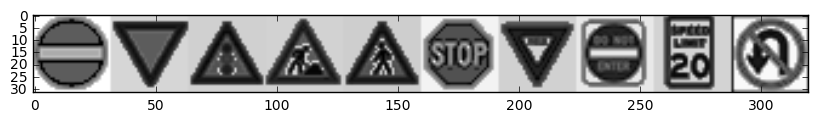

In [74]:
#preprocess new test images
newtest = preprocess2(newtest)
newtest = standardize(newtest)

newtest_image_list = []
for i in range(10):
    newtest_image_list.append((newtest[i].squeeze()).astype(float))

plt.figure(figsize=(10,1))
plt.imshow(np.hstack(newtest_image_list), cmap='gray')

newtest_y = [17,13,26,25,27,14,13,17,0,"unknown"]
print ("Ground truth: ", newtest_y)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose ten (instead of five) images from that were downloaded from the internet. Some images will be difficult to classify. For example, images 7 and 8 are American traffic signs which contain text in the images ('Yield', 'Do Not Enter'), which is not present in the images in the original training set. Image 9 represents an American traffic sign for Speed limit 20, which is significantly different from the corresponding German sign. Image 10 (No U Turn) represents a class which is not in the original training set.  

In [65]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
sess = tf.Session()
new_saver = tf.train.import_meta_graph('lenet2_final.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))

prediction=tf.argmax(logits,1)
print ("predictions: ", prediction.eval(feed_dict={x: newtest}, session=sess))

predictions:  [17 13 26 25 25  0 13 17 25 34]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The classifier trained on the German traffic sign dataset got 6 out of 10 predictions right. The last two images were not in the training set (The Speed Limit 20 sign is an American traffic sign that is different from the German, and the No U-turn traffic sign was not part of the dataset) and therefore the classifier was not expected to make the correct prediction. It, however, got the labels of the fifth and sixth images wrong, which was slightly surprising. <br />
<br />
One reason why the model failed might be the differences in the datasets: the original training set consisted of actual pictures of real-world traffic signs, whereas the new test images were synthetic.

In [75]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
sess = tf.Session()
new_saver = tf.train.import_meta_graph('lenet2_final.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
top5_array = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: newtest})

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

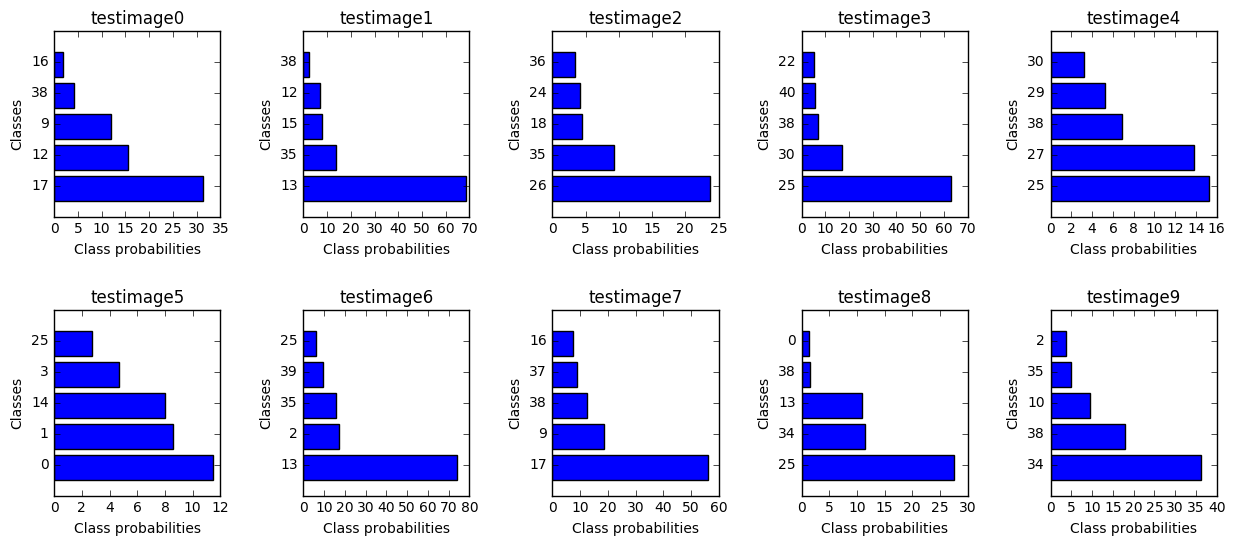

In [137]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(10):
    axs[i].barh(np.arange(0.5,5.5,1.0),top5_array[0][i])
    axs[i].set_title("testimage" + str(i))
    axs[i].set_yticks([1,2,3,4,5])
    axs[i].set_yticklabels(top5_array[1][i])
    axs[i].set_xlabel('Class probabilities')
    axs[i].set_ylabel('Classes')


**Answer:** For the images that are correctly predicted (testimage0-3,6,7), the model is certain about its prediction as seen by the difference in probabilities between the first and second highest classes. For the images that the model was expected to predict correctly (testimage4,5) but failed to do so, the model is less certain about its predictions. In fact, the correct class has the 2nd highest probability for testimage4 and 3rd highest probability for testimage5. The predictions made for testimage8,9 has high certainty although neither types of images were in the training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.